In [120]:
# coding=utf-8

# Author: Ailton José Rodrigues <ajr@cin.ufpe.br>
#

"""
==================================================================================

==================================================================================

In this example, select five public databases with different characteristics. 
For each dataset, calculate Oracle in the test set for: 
    i. Bagging; 
    ii.Adaboost;
    iii.Random subespace (50%) and 
    iiii.Random Oracles. 

Must varying the number of base classifiers {10, 20, ... 100}. Use perceptron as a 
base classifier and split folds using 5-fold cross-validation

"""
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# import five public databases  
from sklearn.datasets import load_breast_cancer # Breast cancer wisconsin(diagnostic)
from sklearn.datasets import load_wine # Wine recognition
from sklearn.datasets import load_boston # Boston house prices 
from sklearn.datasets import load_diabetes # Diabetes 
from sklearn.datasets import load_iris # Iris plants 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.calibration import CalibratedClassifierCV


# models
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



# metrics
from sklearn.metrics import accuracy_score

# ensemblers
from sklearn.ensemble import BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaseEnsemble


from static.oracle import Oracle

In [121]:
import warnings
# warnings.filterwarnings(action='once')
warnings.filterwarnings(action='ignore')

In [122]:
np.random.seed(0)

###### Here define the number of base classifiers {10, 20, ... 100}

In [123]:
# number of base classifiers
num_classifier_base = np.arange(10, 110, 10)

###### Print num_classifier_base

In [124]:
print(num_classifier_base)

[ 10  20  30  40  50  60  70  80  90 100]


accuracy: 0.9658920027341079
Oracle result: 0.9893617021276596
accuracy: 0.9685577580314423
Oracle result: 0.9893617021276596
accuracy: 0.9685577580314423
Oracle result: 0.9893617021276596
accuracy: 0.9659261790840737
Oracle result: 0.9893617021276596
accuracy: 0.9659261790840737
Oracle result: 0.9893617021276596
accuracy: 0.9685577580314423
Oracle result: 0.9893617021276596
accuracy: 0.9659261790840737
Oracle result: 0.9893617021276596
accuracy: 0.9685577580314423
Oracle result: 0.9893617021276596
accuracy: 0.9685577580314423
Oracle result: 0.9893617021276596
accuracy: 0.9711551606288449
Oracle result: 0.9893617021276596


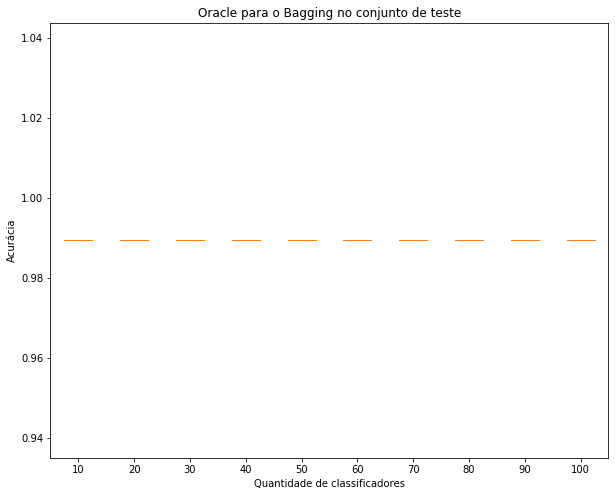

In [140]:
# import datasets

data = load_breast_cancer()
#data = load_wine()
#data = load_boston() 
#data = load_diabetes()
#data = load_iris()

X = data.data
y = data.target

# split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)


# Scale the variables to have 0 mean and unit variance
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


seed=2
kfold = KFold(n_splits=5,random_state=seed)

rng = np.random.RandomState(123)

classificador_oracles = dict.fromkeys(num_classifier_base)

# Calibrating Perceptrons to estimate probabilities
model = CalibratedClassifierCV(Perceptron(max_iter=100),method='sigmoid',cv=kfold)
#model.fit(X_train,y_train)


for n_base_classifiers in num_classifier_base: 
    
    oracles = []
    pool_classifiers = BaggingClassifier(model,n_estimators=n_base_classifiers, random_state=rng)
    pool_classifiers.fit(X_train, y_train)  

    
    result = cross_val_score(pool_classifiers,X_train,y_train,cv=kfold)
    print("accuracy:",result.mean())
    
    oracle = Oracle(pool_classifiers).fit(X_train, y_train)
    oracle_score = oracle.score(X_test, y_test)
    print('Oracle result: {}' .format(oracle.score(X_test, y_test)))
    oracles.append(oracle_score)

    classificador_oracles[n_base_classifiers]=oracles

plt.figure(figsize=(10,8))
plt.boxplot(classificador_oracles.values(), labels=classificador_oracles.keys())
plt.title('Oracle para o Bagging no conjunto de teste')
plt.xlabel('Quantidade de classificadores')
plt.ylabel('Acurácia')
plt.show();